In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np

In [2]:
value = {
    "stepLength": 0.25,
    "stepHeight": 0.15,
    "timeStep": 1e-2,
    "stepKnots": 25,
    "supportKnots": 2,
}

In [3]:
xs = []
zs = []

for k in range(value["stepKnots"]):
    phKnots = value["stepKnots"] / 2
    
    if k < phKnots:
        x = value["stepLength"] * (k + 1) / value["stepKnots"]
        z = value["stepHeight"] * k / phKnots
    elif k == phKnots:
        x = value["stepLength"] * (k + 1) / value["stepKnots"]
        z = value["stepHeight"]
    else:
        x = value["stepLength"] * (k + 1) / value["stepKnots"]
        z = value["stepHeight"] * (1 - float(k + 1 - phKnots) / phKnots)
    
    xs.append(x)
    zs.append(z)

In [4]:
com_xs = []
com_ys = []
comPercentage = 0.25

for k in range(value["stepKnots"]):
    com_x = (value["stepLength"] * (k + 1) / value["stepKnots"]) * comPercentage
    
    com_xs.append(com_x)
    com_ys.append(0.0)

In [5]:
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
plt.rcParams["font.size"] = 12

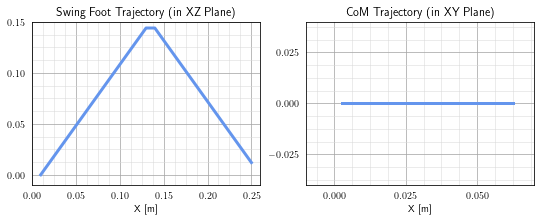

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(9, 3))

axs[0].plot(xs, zs, linewidth=3, color="cornflowerblue")
axs[0].set_title("Swing Foot Trajectory (in XZ Plane)", fontsize=12)

axs[0].xaxis.set_major_locator(MultipleLocator(0.05))
axs[0].xaxis.set_minor_locator(MultipleLocator(0.0125))
axs[0].yaxis.set_major_locator(MultipleLocator(0.05))
axs[0].yaxis.set_minor_locator(MultipleLocator(0.0125))
axs[0].grid(True, "minor", color="0.85", linewidth=0.50, zorder=-20)
axs[0].grid(True, "major", color="0.65", linewidth=0.75, zorder=-10)
axs[0].tick_params(which="both", bottom=False, left=False)

axs[0].set_xlim([0.0, 0.26])
axs[0].set_ylim([-0.01, 0.15])

axs[0].set_xlabel(r"$\text{X [m]}$")
axs[0].yaxis.set_label_coords(-0.2, 0.5)


axs[1].plot(com_xs, com_ys, linewidth=3, color="cornflowerblue")
axs[1].set_title("CoM Trajectory (in XY Plane)", fontsize=12)

axs[1].xaxis.set_major_locator(MultipleLocator(0.025))
axs[1].xaxis.set_minor_locator(MultipleLocator(0.025/4))
axs[1].yaxis.set_major_locator(MultipleLocator(0.025))
axs[1].yaxis.set_minor_locator(MultipleLocator(0.025/4))
axs[1].grid(True, "minor", color="0.85", linewidth=0.50, zorder=-20)
axs[1].grid(True, "major", color="0.65", linewidth=0.75, zorder=-10)
axs[1].tick_params(which="both", bottom=False, left=False)

axs[1].set_xlim([-0.01, 0.07])
axs[1].set_ylim([-0.04, 0.04])

axs[1].set_xlabel(r"$\text{X [m]}$")
axs[1].yaxis.set_label_coords(-0.3, 0.5)

plt.savefig("../imgs/walkingmotion.png", dpi=200, transparent=False, bbox_inches="tight")